In [1]:
"""
Reading files from the given java folder path
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from math import radians, sin, cos, acos
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/nishit_dhakar/Desktop/Python/"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '3months.csv', 'ADM_tickets.csv', 'ADM_tickets.xlsx', 'Counter.csv', 'CountOccurance.ipynb', 'Data.csv', 'FMS Service Application Details.xlsx', 'L2L3.csv', 'L2L3.ipynb', 'L2L3.xlsx', 'NonSAP_Tkt.csv', 'Original.ipynb', 'Pattern.csv', 'Pattern.xlsx', 'PMI_Detailed_Analysis_3_Months.xlsx', 'pmi_non_sap_23_May.ipynb', 'test.csv']


# Code to analyze ticket data

In [2]:
"""
Reading files from the given java folder path and using the encoding ISO-8859-1
"""

# Path of the file to read
pmi_file_path = 'C:/Users/nishit_dhakar/Desktop/Python/ADM_tickets.csv'
#Read file from the csv
pmi_df = pd.read_csv(pmi_file_path ,encoding = 'ISO-8859-1')
pmi_df.shape

(85586, 17)

In [3]:
pmi_df.isna().sum()

ï»¿Number                0
Short Description        0
Service                  0
Description            173
Category                 0
Urgency              70474
Impact                   0
Assignment Group         1
Close Code              17
Close Notes             43
Create Time              0
Resolve Time             0
SAP/Non-SAP              0
MTTR Days                0
MTTR Hours               0
MTTR Minutes             0
Remark                 125
dtype: int64

In [4]:
"""
Cleanup of the field name to more short and relevent name
"""

pmi_df.rename(columns={'Number':'Number',
                       'Short Description':'short_description',
                          'Service':'service',
                        'Issue id':'issueid',
                           'Description' : 'description' ,
                           'Category' : 'category' ,
                       'Impact' : 'impact' ,
                       'Priority' : 'priority' ,
                       'Assignment Group' : 'assignment_group' ,
                       'Close Code' : 'close_code' ,
                       'Close Notes' : 'close_notes' ,
                       'Create Time': 'create_time' ,
                       'Resolve Time' : 'resolve_time' ,
                       'SAP/Non-SAP' : 'applicationtype',
                       'Remark':'remark'
                      },  
                 inplace=True)

In [5]:
pmi_df.head(1)

,ï»¿Number,short_description,service,description,category,Urgency,impact,assignment_group,close_code,close_notes,create_time,resolve_time,applicationtype,MTTR Days,MTTR Hours,MTTR Minutes,remark
0,SRQ#618,The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (...,IQAR Application for PMI,Alert Type: The Job pmi_erp_iqar_GCRS_Prod_Vol...,Complaint,Normal,None,Global Backlog Reduction Group,Not Solved (Unable),The Global Backlog Reduction exercise was perf...,12/2/2018 8:45,9/11/2019 11:04,non-SAP,203,1616.095914,292320,The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (...


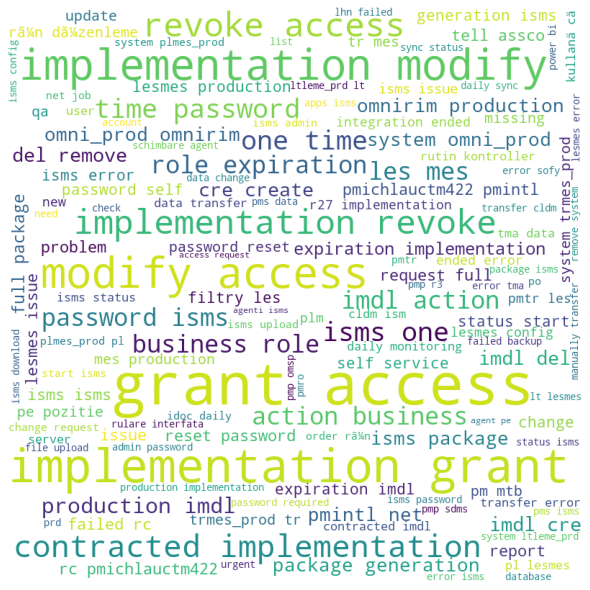

In [6]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in pmi_df.short_description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
pmi_df.service.value_counts()

iSMS Application for PMID              6526
LES/MES Application for PMPL           5954
OMSP Application for PMI               4844
LES/MES Application for PMTR           4503
iSMS Application for PMPL              3970
                                       ... 
Risk Management Application for PMI       6
CTR Application for PMRD                  5
ECP Application for PMI                   4
PMIMSS iSMS for PMCO                      3
iSMS Tobacco Application for PMCO         1
Name: service, Length: 145, dtype: int64

In [8]:
from collections import Counter
import nltk
#nltk.download('punkt')

#r1 = pmi_df.short_description.values
r1 = pmi_df.remark.values

final_string = "";
for value in r1:
    final_string = final_string  + value + " ";

TypeError: can only concatenate str (not "float") to str

In [9]:
stopwords = [' ','the','a', 'about', 'above', 'across', 'after', 'afterwards','again', 'against', 'all', 'almost', 'alone', 'along','already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another','any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['in','.', 'to', 'the', 'of', 'on', 'for','any', 'with', 'is', 'no',':', '[', ']']
stopwords += ['why','what', 'did', 'use', 'no', 'has', 'yes','who', 'where', 'goes', 'as','an', 'how']
stopwords += ['kindly','.', 'all', 'time', 'feel', 'thank', '"','>', '<', 'from', '&','let', '(', ')','|']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became','because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below','beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant','co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due','during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever','every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first','five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give','go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers','herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed','interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made','many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much','must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none','noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or','other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please','put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'several', 'she', 'should','show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime','sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves','then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they','thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to','together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon','us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where','whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who','whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your','yours', 'yourself', 'yourselves']



In [10]:
# Given a list of words, remove any that are
# in a list of stop words.

def removeStopwords(wordlist, stopwords):
    #wordlist((k.lower(), v) for k,v in {'My Key':'My Value'}.items())
    newList = list(map(lambda x: x.lower(), wordlist))
    return [w for w in newList if w not in stopwords]

In [11]:
from nltk.tokenize import word_tokenize
wordlist = word_tokenize(final_string)
refwordlist= removeStopwords(wordlist, stopwords)
#finalList = refwordlist.sort(reverse=True)
#finalList= sortFreqDict(refwordlist)


In [12]:
result =Counter(" ".join(refwordlist).split(" ")).items()

import csv
with open('test.csv', 'w', encoding='utf-8') as f:
    for k,v in result:
        f.write("%s,%s\n"%(k,v))

In [13]:
from polyglot.detect import Detector
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

#r1 = pmi_df.short_description.values
r1 = pmi_df.remark.values

final_string = "";
for value in r1:
    final_string = Detector(final_string).languages  + value + " ";
    
wordlist = word_tokenize(final_string)

result =Counter(" ".join(wordlist).split(" ")).items()

import csv
with open('lang.csv', 'w', encoding='utf-8') as f:
    for k,v in result:
        f.write("%s,%s\n"%(k,v))

ModuleNotFoundError: No module named 'polyglot'